<a href="https://colab.research.google.com/github/Patricia1501/LetsGrowMore-Data-Science-Internship/blob/main/Task_4(Beginner_Level)Image_to_Pencil_Sketch_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### LetsGrowMore Internship(Beginner Level Task 4)

## <b><u><center>Image to Pencil Sketch using Python</b></u></center>

#### <b>Steps to follow to perform the Image To Pencil Sketch using python:
1)In this project,First find an image that you want to convert to a pencil sketch with Python.<br>

2)Next, we need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo.<br>

3)Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details.<br>

4)Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. <br>

5)This can be done by dividing the grayscale image by the inverted blurry image. <br>

6)Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.

#### Import Libraries
OpenCV is the only library which is needed for the project.<br>
We will also be using matplotlib library for some visualizations which is discussed later.

In [ ]:
import cv2             
import matplotlib.pyplot as plt    

#### Read Photo
The following command can be used to read image using OpenCV.

In [ ]:
img=cv2.imread("bird_peacock.jpg")
#This command reads the file bird_peacock.jpg located in the current folder and stores in memory as img.

#### Show Image using OpenCV
Displaying image using OpenCV is not very straight forward. The following command can be used to display the photo.

In [ ]:
# When this command is executed, the below photo will open in a new window with title as ‘Original image.’
cv2.imshow('Original image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Display Using Matplotlib
It is not very convenient when new window opens up every time image has to be displayed and also the new window has to be deleted for further execution of code.<br>
To avoid these hassles, we can use pyplot module of matplotlib library to display the image in the Jupyter notebook itself.<br>

The following command can be used to display cv2 image using matplotlib.

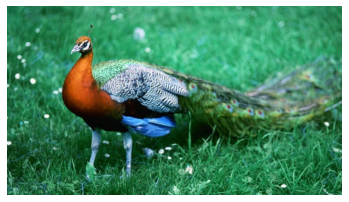

In [ ]:
plt.imshow(img)
plt.axis(False)
plt.show()

#### Matplotlib vs OpenCV
We can observe that the image displayed using matplotlib is not consistent with the original image.
This is because OpenCV uses BGR color scheme whereas matplotlib uses RGB colors scheme.
We can convert BGR image to RGB by using any of the following methods.

#### Convert BGR to RGB: Method 1

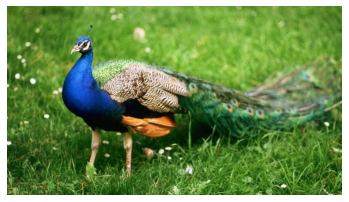

In [ ]:
plt.imshow(img[:,:,::-1])
plt.axis(False)
plt.show()

#### Convert BGR to RGB: Method 1
Using cvtColor method of OpenCV.

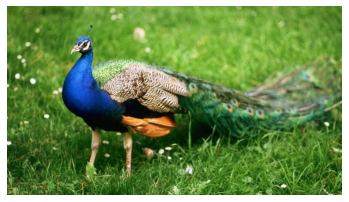

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.axis(False)
plt.show()

#### Convert Image to a Pencil Sketch
Converting a photo to pencil sketch involves the following steps:

#### Step 1: Convert to Grey Image
Using cvtColor function of OpenCV.

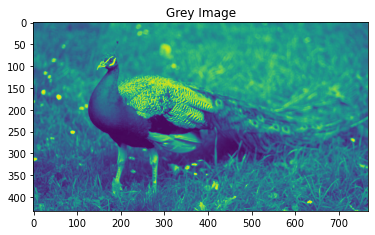

In [ ]:
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_img)
plt.title("Grey Image")
plt.show()

#### Step 2: Invert Image
Inverting the image can be done by either of the following methods

In [ ]:
invert_img=cv2.bitwise_not(grey_img)
#invert_img=255-grey_img

#### Step 3: Blur image
Apply Gaussian blur to the image. The second argument to the function is the kernel size, if should be a pair of odd numbers.<br>
Larger the kernel size, more blurred the image will be and it will lose its subtle features.<br>
For creating sketch, we require only the prominent features (contrasting edges) from the image.<br>
For small images, kernel size of (3,3), (5,5) etc. will be sufficient, whereas for larger images, small kernel size do not create any impact.<br>
Appropriate kernel size can be selected by trial and error method.

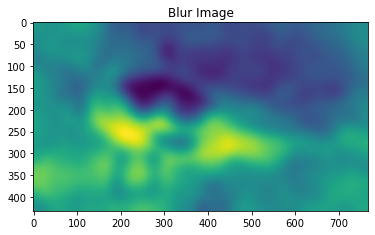

In [ ]:
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)
plt.imshow(blur_img)
plt.title("Blur Image")
plt.show()

#### Step 4: Invert Blurred Image
(Repeat step 2)

In [ ]:
invblur_img=cv2.bitwise_not(blur_img)
#invblur_img=255-blur_img

#### Step 5: Sketch
The sketch can be obtained by performing bit-wise division between the grayscale image and the inverted-blurred image.

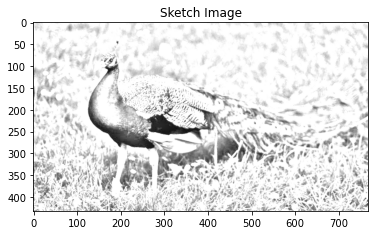

In [ ]:
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
#plt.imshow(sketch_img)
plt.title("Sketch Image")
plt.show()

#### Step 6: Save Sketch

In [ ]:
cv2.imwrite('sketch.png', sketch_img)

True

#### Step 7: Display sketch

In [ ]:
# When this command is executed, the photo will open in a new window with title as ‘sketch image.’
cv2.imshow('sketch image',sketch_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Original Image vs Sketch
We can display the original image and sketch side by side for comparison.

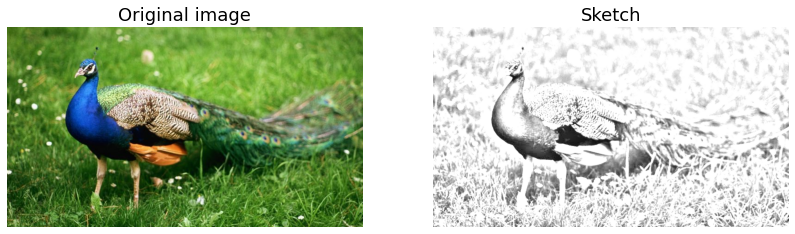

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Original image', size=18)
plt.imshow(RGB_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Sketch', size=18)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
plt.axis('off')
plt.show()